# Data Storytelling Exercise

How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story

Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

Get going by asking the following questions and looking for the answers with some code and plots:

* Can you count something interesting?

* Can you find some trends (high, low, increase, decrease, anomalies)?

* Can you make a bar plot or a histogram?

* Can you compare two related quantities?

* Can you make a scatterplot?

* Can you make a time-series plot?

Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:

* The questions you asked
* The trends you investigated
* The resulting visualizations and conclusions.

In case the data set is too large to commit to Github, please include a link to the data set inside the Jupyter notebook.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

# set option to NOT truncate columns in DF display
pd.set_option('display.max_columns', None)
# disable copy/slice dataframe warning
pd.options.mode.chained_assignment = None  # default='warn'

## Data set
For this assignment, I will be examining and telling the story of the USA 7s matches for the 2017-2018 season.

In [84]:
df = pd.read_csv('../Capstone1/Springboard_Capstone1/data/output/all_USA_2017-18_matches_result.csv')

In [85]:
# look at the distribution of the data
df.describe()

,MatchID,TotalPoints,Scores,Conversions,Total PointsConceded,Tries,Total Tries Conceded,Try Scoring Rate(1 every x secs),Try Conceding Rate(1 every x secs),Tries Scored Build-Up(No Ruck/Maul),Tries Conceded Build-Up(No Ruck/Maul),Opp22m Entries,Opp22m Entry Rate (1 every x secs),Own22m Entries,Own22m Entry Rate(1 every x secs),Possession Time,Possession Time(Opp),Passes,Passing Rate(1 every x secs),Rucks Attack,Rucking Rate Attack (secs),Defensive Rucks,% Ruck Success Own,Own Rucks Won per Match,% Ruck Success Opp,Opp Rucks Won per Match,Turnovers Won,Turnovers Conceded,Turnover Differential,Own Contestable Restarts,Own Contestable Restarts Regained,Contestable_Restart_Win_Pct,Opp Contestable Restarts,Opp Contestable Restarts Received,Total Scrums Own Feed,Scrum Success Own Feed,Scrum_Win_Pct,Total Lineouts Own Throw,Lineout Success Own Throw,Lineout_Win_Pct,Penalty/FK Conceded,Ruck-Maul Penalties Conceded,Yellow_Red Cards,Result
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,30.000000,39.000000,19.559322,0.642696,19.440678,3.084746,3.067797,78.313559,78.322034,1.474576,1.474576,4.415254,56.442373,4.415254,64.107627,205.762712,205.762712,31.745763,7.016102,9.432203,26.188136,9.432203,0.854725,8.127119,0.145275,1.305085,4.093220,4.093220,0.000000,2.974576,1.144068,33.097256,2.974576,1.830508,1.203390,1.186441,0.696328,1.483051,1.271186,0.651977,2.711864,1.516949,0.237288,0.601695
std,17.102007,8.833696,10.121942,0.316920,10.226948,1.555669,1.567451,50.568680,50.566852,1.252088,1.252088,1.931857,37.397933,1.931857,56.870829,52.241497,52.241497,12.271979,1.917663,4.283698,18.924534,4.283698,0.127816,4.047890,0.127816,1.173121,2.075446,2.075446,2.733146,1.603745,1.056323,28.699541,1.603745,1.127019,1.042345,1.029058,0.457413,1.160114,1.129715,0.449951,1.685036,1.238506,0.465529,0.615190
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,92.000000,7.000000,3.800000,1.000000,11.400000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.250000,34.000000,12.000000,0.500000,12.000000,2.000000,2.000000,48.000000,48.000000,1.000000,1.000000,3.000000,36.525000,3.000000,29.225000,168.000000,168.000000,22.250000,5.700000,7.000000,18.625000,7.000000,0.754808,6.000000,0.000000,0.000000,2.250000,2.250000,-2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.250000,0.250000,0.000000,0.000000
50%,30.000000,40.000000,19.000000,0.666667,19.000000,3.000000,3.000000,66.000000,66.000000,1.000000,1.000000,4.000000,46.600000,4.000000,45.550000,203.500000,203.500000,30.000000,6.800000,9.000000,22.400000,9.000000,0.875000,7.500000,0.125000,1.000000,4.000000,4.000000,0.000000,3.000000,1.000000,33.333333,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,44.750000,45.000000,27.750000,1.000000,27.750000,4.000000,4.000000,89.500000,89.500000,2.000000,2.000000,6.000000,65.925000,6.000000,69.700000,230.250000,230.250000,39.000000,7.975000,12.000000,28.050000,12.000000,1.000000,11.000000,0.245192,2.000000,6.000000,6.000000,2.000000,4.000000,2.000000,50.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.000000,0.000000,1.000000
max,59.000000,59.000000,47.000000,1.000000,47.000000,7.000000,7.000000,312.000000,312

In [100]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
type(df['Date'][0])
df['Date'][0]

Timestamp('2017-12-02 00:00:00')

## Analysis of USA 7s Team Performance, 2017-18
I will be looking at the USA 7s team performance in the 2017-18 World Series, looking at the most important features as determined by a Random Forest model that was built from the USA's matches on the World Series from the 2015-16 season through the 2017-18 season.

I'll also be looking at how these important features hold up in the real world.  In the first two tournaments of the 2018-19 World Series, how did the USA perform in match statistics deemed important by the model, and how did that performance translate into wins and losses?

**USA 7s 2017-18 World Series Results**
    
In the 2017-18 World Series, the USA finsihed the Series in 6th place, winning one Cup in Las Vegas. Overall, the USA had a record of 33-22-4 in the 2017-18 season.

In their 33 wins, the USA had a mean score of 29.24 points for and 10.70 points against, and 4.58 tries for and 1.73 against.

In the USA's 22 losses, the USA had a mean score of 11.86 points for and 25.68 points against, and 1.86 tries for and 4.05 against.

In [104]:
#df of only USA matches
usa = df[(df['Team'] == 'USA')]

In [105]:
#Examine the descriptive statistics for only USA matches
usa.describe()

,MatchID,TotalPoints,Scores,Conversions,Total PointsConceded,Tries,Total Tries Conceded,Try Scoring Rate(1 every x secs),Try Conceding Rate(1 every x secs),Tries Scored Build-Up(No Ruck/Maul),Tries Conceded Build-Up(No Ruck/Maul),Opp22m Entries,Opp22m Entry Rate (1 every x secs),Own22m Entries,Own22m Entry Rate(1 every x secs),Possession Time,Possession Time(Opp),Passes,Passing Rate(1 every x secs),Rucks Attack,Rucking Rate Attack (secs),Defensive Rucks,% Ruck Success Own,Own Rucks Won per Match,% Ruck Success Opp,Opp Rucks Won per Match,Turnovers Won,Turnovers Conceded,Turnover Differential,Own Contestable Restarts,Own Contestable Restarts Regained,Contestable_Restart_Win_Pct,Opp Contestable Restarts,Opp Contestable Restarts Received,Total Scrums Own Feed,Scrum Success Own Feed,Scrum_Win_Pct,Total Lineouts Own Throw,Lineout Success Own Throw,Lineout_Win_Pct,Penalty/FK Conceded,Ruck-Maul Penalties Conceded,Yellow_Red Cards,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,39.152542,22.186441,0.686239,16.966102,3.474576,2.694915,85.491525,71.152542,1.525424,1.423729,4.898305,55.881356,3.932203,81.423729,229.084746,182.440678,37.203390,6.545763,10.355932,25.377966,8.508475,0.878939,9.135593,0.169489,1.389831,3.779661,4.406780,-0.627119,3.372881,1.576271,44.188862,2.576271,1.864407,1.016949,1.000000,0.621469,1.898305,1.711864,0.836158,2.576271,1.491525,0.101695,0.694915
std,17.175564,8.940056,10.331530,0.293777,9.316219,1.579567,1.441434,56.175333,43.564385,1.291296,1.220562,1.854119,39.204673,1.901582,69.024449,46.025963,47.753776,11.505291,1.777961,3.735952,12.370670,4.617705,0.117286,3.486217,0.134188,1.144958,1.781783,2.305306,2.671034,1.530138,1.147762,29.540792,1.588790,1.209982,0.991194,0.964901,0.485252,1.077912,1.083590,0.327889,1.763650,1.356630,0.304841,0.594638
min,1.000000,15.000000,5.000000,0.000000,0.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,22.500000,0.000000,0.000000,137.000000,92.000000,12.000000,3.800000,2.000000,13.900000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,34.000000,14.000000,0.500000,12.000000,2.000000,2.000000,51.000000,46.000000,1.000000,1.000000,4.000000,38.350000,2.000000,36.100000,197.000000,155.000000,28.500000,5.450000,8.000000,18.750000,6.000000,0.806250,7.000000,0.029412,0.500000,3.000000,2.000000,-3.000000,2.000000,1.000000,33.333333,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,30.000000,40.000000,22.000000,0.714286,14.000000,4.000000,2.000000,71.000000,65.000000,1.000000,1.000000,5.000000,46.500000,4.000000,56.300000,224.000000,176.000000,37.000000,6.200000,10.000000,21.700000,8.000000,0.900000,9.000000,0.153846,1.000000,4.000000,5.000000,-1.000000,3.000000,2.000000,50.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,44.500000,45.000000,28.000000,1.000000,24.000000,4.500000,4.000000,92.500000,87.500000,2.000000,2.000000,6.000000,65.150000,6.000000,100.650000,265.000000,210.500000,43.500000,7.200000,13.000000,26.550000,10.000000,1.000000,11.000000,0.267857,2.000000,5.000000,6.000000,1.000000,4.000000,2.000000,66.666667,4.000000,3.000000,2.000000,2.000000,1.000000,2.500000,2.000000,1.000000,4.000000,2.000000,0.000000,1.000000
max,59.000000,59.000000,47.000000,1.000000,35.000000,7.000000,5.000000,312.000000,225.000000,5.000000,5.000000,10.000000

## Feature Importance
In the modelling of the [Random Forest model](http://127.0.0.1:8888/notebooks/Dropbox/Springboard_DataScience/Capstone1/Springboard_Capstone1/code/Model_Eval_RF.ipynb) that was built on the USAs match data from 2015 - 2018, the Feature Importance ('feature_importances_') was extracted from the model.

Let's look at the top five important features and see how the USA stacked up in these areas in the 2017-18 World Series.  We will also see how the USA performed in the important features in the first two tournaments of the 2018-19 World Series tournaments.

| Feature | Importance |
| --- | --- |
|Poss_Time_Diff | 0.259110 |
|PenFK_Against_Diff | 0.170337 |
|Contestable_KO_Win_pct_Diff  |  0.140098  |
|Passes_Diff | 0.126238  |
|Ruck_Win_pct_Diff | 0.115913 |

In [202]:
#Select subset of the most important features from RF model from USA matches
#Poss_Time_Diff, PenFK_Against_Diff, Contestable_KO_Win_pct_Diff, Passes_Diff, Ruck_Win_pct_Diff 
impt_feat = usa[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own']]

## Trends 
Let's take a look at the high, low, and anomalies for the USA's important features in the 2017-18 season, including mean scoring differentials in wins vs. losses.

In [132]:
# Imprt features: ['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded','% Ruck Success Own']
restart_min = usa['Contestable_Restart_Win_Pct'].min()
restart_max = usa['Contestable_Restart_Win_Pct'].max()
poss_min = usa['Possession Time'].min()
poss_max = usa['Possession Time'].max()
pass_min = usa['Passes'].min()
pass_max = usa['Passes'].max()
pen_min = usa['Penalty/FK Conceded'].min()
pen_max = usa['Penalty/FK Conceded'].max()
ownruck_min = usa['% Ruck Success Own'].min()
ownruck_max = usa['% Ruck Success Own'].max()

print("Min Restart Win %:",restart_min)
print("Max Restart Win %:",restart_max,'\n')
print("Min Possession Time:",poss_min,"sec")
print("Max Possession Time:",poss_max,"sec\n")
print("Min Passes:",pass_min)
print("Max Passes:",pass_max, '\n')
print("Min Penalty/Free Kick:",pen_min)
print("Max Penalty/Free Kick:",pen_max, '\n')
print("Min Own Ruck Win %:",ownruck_min)
print("Max Own Ruck Win %:",ownruck_max)

Min Restart Win %: 0.0
Max Restart Win %: 100.0 

Min Possession Time: 137 sec
Max Possession Time: 325 sec

Min Passes: 12
Max Passes: 69 

Min Penalty/Free Kick: 0
Max Penalty/Free Kick: 6 

Min Own Ruck Win %: 0.5
Max Own Ruck Win %: 1.0


## 2017-18 Scoring Differentials between USA Wins and Losses

In [109]:
print("2017-18 Scoring Differentials between USA Wins and Losses \n")

#Differences in Mean scores, Tries for Win/Loss
points_diff = usa_w['Scores'].mean() - usa_l['Scores'].mean()
print("Difference in mean Points Scored: " + str(round(points_diff, 2)))

points_concede_diff = usa_w['Total PointsConceded'].mean() - usa_l['Total PointsConceded'].mean()
print("Difference in mean Points Conceded: " + str(round(points_concede_diff, 2)))

try_diff = usa_w['Tries'].mean() - usa_l['Tries'].mean()
print("Difference in mean Tries Scored: " + str(round(try_diff, 2)))

try_concede_diff = usa_w['Total Tries Conceded'].mean() - usa_l['Total Tries Conceded'].mean()
print("Difference in mean Tries Conceded: " + str(round(try_concede_diff, 2)))

2017-18 Scoring Differentials between USA Wins and Losses 

Difference in mean Points Scored: 17.38
Difference in mean Points Conceded: -14.98
Difference in mean Tries Scored: 2.71
Difference in mean Tries Conceded: -2.32


## Anomaly Detection
Let's also take a look at anomalies among the important features, using the outliers in boxplots to identify the anomalies.

{'whiskers': [<matplotlib.lines.Line2D at 0x110fc64e0>,
 'caps': [<matplotlib.lines.Line2D at 0x110fc6940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23b107f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23440c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a23440b38>],
 'means': []}

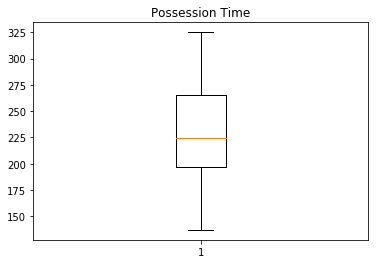

In [172]:
# 'Possession Time'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Possession Time')
ax3.boxplot(usa['Possession Time'], flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a22574630>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2252a978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a234c5208>],
 'medians': [<matplotlib.lines.Line2D at 0x1a22600a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a22600c18>],
 'means': []}

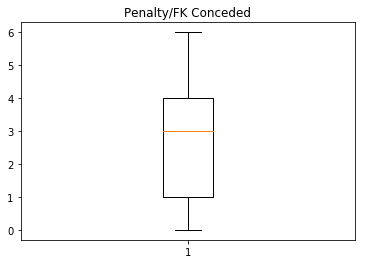

In [171]:
# 'Penalty/FK Conceded'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Penalty/FK Conceded')
ax3.boxplot(usa['Penalty/FK Conceded'], flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23960cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a239609b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23960b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1a25ba0c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a25ba0048>],
 'means': []}

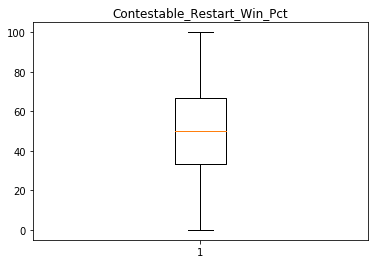

In [170]:
# 'Contestable_Restart_Win_Pct'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Contestable_Restart_Win_Pct')
ax3.boxplot(usa['Contestable_Restart_Win_Pct'], flierprops=green_diamond)

## Own Ruck Success and Passes Outliers/Anomalies
On the '% Ruck Success Own' feature, the USA's 50% win percentage is outside 1.5 of the Interquartile Range, and the 69 passes in the 'Passes' feature was the other outlier.

The instance of the Passes anomaly occurred in a match against New Zealand	in the 2018 Paris 7s, which resulted in a loss.

The anomaly of the 50% win of their own rucks ocurred in a match against Kenya in the 2018 London 7s, which resulted in a rare tie.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23a39048>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23a39080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23a39ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a21edf390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a21edf358>],
 'means': []}

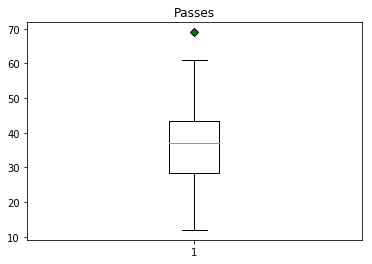

In [169]:
# 'Passes'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Passes')
ax3.boxplot(usa['Passes'], flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23b24278>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23b24860>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23b24080>],
 'medians': [<matplotlib.lines.Line2D at 0x1a237bba58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a237bbc88>],
 'means': []}

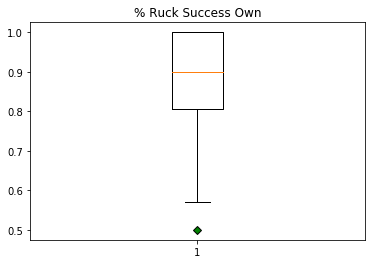

In [168]:
#ax = sns.boxplot(y='Possession Time', fliersize=.60, data=usa)
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('% Ruck Success Own')
ax3.boxplot(usa['% Ruck Success Own'], flierprops=green_diamond)

In [190]:
# usa_w = df[(df['Team'] == 'USA') & (df['Result'] == 1)]
# find match where the USA had an outlier of 50% own rate in their own rucks 
outlier_ruck = usa.loc[usa['% Ruck Success Own'] == .50]
outlier_ruck[['Team', 'Opposition', 'Date', 'Tournament', '% Ruck Success Own','Result']]

,Team,Opposition,Date,Tournament,% Ruck Success Own,Result
116,USA,Kenya,2018-06-03,2018_London_7s,0.5,2


In [191]:
# find match where the USA had an outlier of 69 passes
outlier_pass = usa.loc[usa['Passes'] == 69]
outlier_pass[['Team', 'Opposition', 'Date', 'Tournament', 'Passes','Result']]

,Team,Opposition,Date,Tournament,Passes,Result
104,USA,New Zealand,2018-05-27,2018_Paris_7s,69,0


## Time Series

In [ ]:
# set periods to 10, as there are 10 tournament, so 10 periods
dates = pd.date_range(start='2017-12-02', end='2018-06-03')
dates

In [203]:
#ts = [('Possession Time', index=dates)]

In [ ]:
# create time series - need one?
#Series(ao[:,2], index=dates)
#ts = pd.Series(df['Possession Time'], index=dates)
ts=df[['Date','Possession Time']]
#ts
ts.plot()
#plot('time_ser')

## Comparing the USA's Performance in Important Feature Statistics in Wins vs. Losses
Look at how the USA performed in 2017-18 in the match statistics identified in the Random Forest Model as important features - features that contribute to the prediction of a win or a loss.  Because the model's important features don't tell us whether the feature had a positive or nagative impact on the result, we will need to examine these features in the match data, in a bit more depth.

In [201]:
#Select USA Wins
usa_w = df[(df['Team'] == 'USA') & (df['Result'] == 1)]
#Select USA Losses
usa_l = df[(df['Team'] == 'USA') & (df['Result'] == 0)]
#usa_t = df[(df['Team'] == 'USA') & (df['Result'] == 2)]

In [211]:
w_impt_feat = usa_w[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own']]
print('Important Feature Means in USA Wins')
w_impt_feat.agg(['mean'])

Important Feature Means in USA Wins


,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
mean,243.121212,36.757576,51.731602,2.575758,0.893474


In [212]:
# USA losses
l_impt_feat = usa_l[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own']]
print('Important Feature Means in USA Losses')
l_impt_feat.agg(['mean'])

Important Feature Means in USA Losses


,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
mean,214.681818,38.909091,32.575758,2.545455,0.869217


In [213]:
# all USA matches
impt_feat = usa[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own']]
print('Important Feature Means in All USA Matches')
impt_feat.agg(['mean'])

Important Feature Means in All USA Matches


,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
mean,229.084746,37.20339,44.188862,2.576271,0.878939


## Visualizing Important Features in USA Wins and Losses

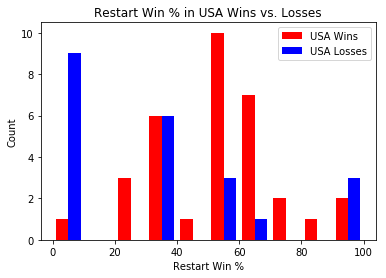

In [206]:
# Create a histogram of Contestable_Restart_Win_Pct
wins = usa_w['Contestable_Restart_Win_Pct']
losses = usa_l['Contestable_Restart_Win_Pct']
legend = ['USA Wins', 'USA Losses']
plt.hist([wins, losses], color=['red', 'blue'], bins=10)
plt.ylabel('Count')
plt.xlabel('Restart Win %')
plt.legend(legend)
plt.title('Restart Win % in USA Wins vs. Losses')
plt.show()

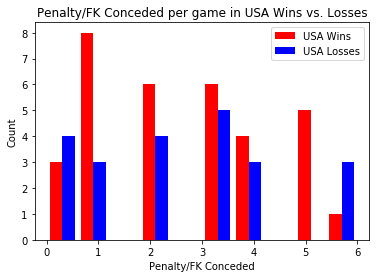

In [77]:
#Create a histogram of 'Penalty/FK Conceded'
wins = usa_w['Penalty/FK Conceded']
losses = usa_l['Penalty/FK Conceded']
legend = ['USA Wins', 'USA Losses']
plt.hist([wins, losses], color=['red', 'blue'], bins=10)
plt.ylabel('Count')
plt.xlabel('Penalty/FK Conceded')
plt.legend(legend)
plt.title('Penalty/FK Conceded per game in USA Wins vs. Losses')
plt.show()

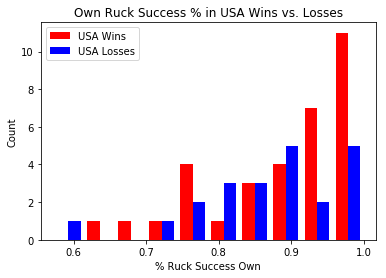

In [207]:
#Create a histogram of Possession Time
wins = usa_w['% Ruck Success Own']
losses = usa_l['% Ruck Success Own']
legend = ['USA Wins', 'USA Losses']
plt.hist([wins, losses], color=['red', 'blue'], bins=10)
plt.ylabel('Count')
plt.xlabel('% Ruck Success Own')
plt.legend(legend)
plt.title('Own Ruck Success % in USA Wins vs. Losses')
plt.show()

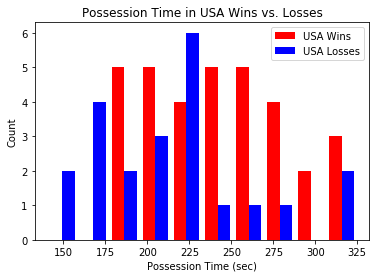

In [208]:
#Create a histogram of Possession Time
wins = usa_w['Possession Time']
losses = usa_l['Possession Time']
legend = ['USA Wins', 'USA Losses']
plt.hist([wins, losses], color=['red', 'blue'], bins=10)
plt.ylabel('Count')
plt.xlabel('Possession Time (sec)')
plt.legend(legend)
plt.title('Possession Time in USA Wins vs. Losses')
plt.show()

In [209]:
# check the correlation between Restart Win % and Win
# using 'point biserial' correlation, which is used to measure the relationship between a binary variable, x, and a continuous variable, y. 
from scipy import stats
own_ruck_succ = df['% Ruck Success Own']
results = df['Result']
stats.pointbiserialr(results, own_ruck_succ)

PointbiserialrResult(correlation=0.06620857358840583, pvalue=0.47625722259663106)

In [81]:
# check the correlation between Penalty/FK Conceded
from scipy import stats
penfk = df['Penalty/FK Conceded']
results = df['Result']
stats.pointbiserialr(results, penfk)

PointbiserialrResult(correlation=-0.020962113773336528, pvalue=0.8217399834350507)

In [210]:
# check the correlation between Restart Win % and Win
# using 'point biserial' correlation, which is used to measure the relationship between a binary variable, x, and a continuous variable, y. 
from scipy import stats
restart_pct = df['Contestable_Restart_Win_Pct']
results = df['Result']
stats.pointbiserialr(results, restart_pct)

PointbiserialrResult(correlation=0.297187599908392, pvalue=0.0010827869133522286)

## Plotting relationships between Important Features

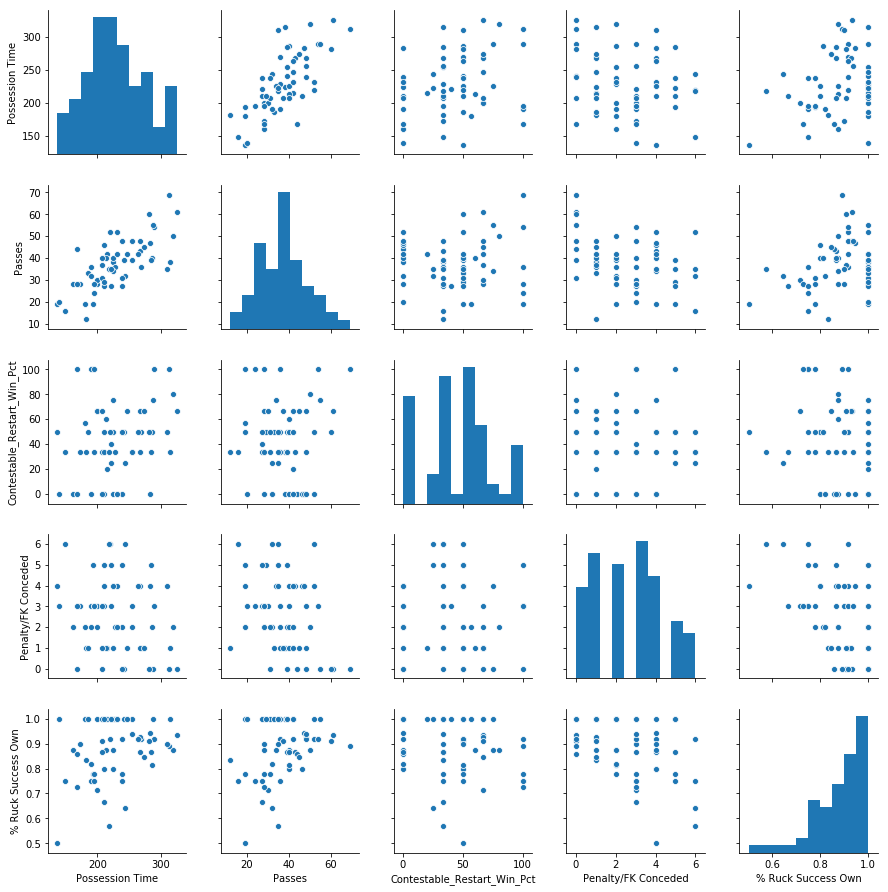

In [70]:
sns.pairplot(impt_feat,  palette='Set1') #hue='Result',
plt.show()

## Important Feature Correlation
Looking at the shape of the scatterplots, it looks like only Possession Time and Passes are correlated.  Let's look at the strength of this correlation.

/Users/admin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


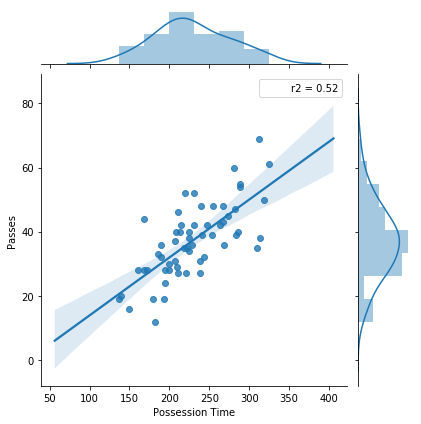

In [73]:
#Plot relationship between Poss Time Diff and Passes
# add Pearson's R value
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
#sns.jointplot(x, y, kind="reg", stat_func=r2)

sns.jointplot(x='Possession Time', y='Passes', data=impt_feat, kind="reg", stat_func=r2);

The correlation between Possession Time and Passes has a Pearson's R of 0.52, which makes intuitive sense - the longer a team has the ball, the more passes they are likely to make.

## Important Feature Performance in 2018-19
How did the USA perform in the 'important features' in Dubai and Cape Town, the first two tournaments of 2018-19?

*Data for these two tournaments will be released by World Rugby this week.*